# example CMIP EC Calc

In [15]:
import sys
sys.path.append(sys.path[0]+'/../../')

#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils.ecIndex as ec

# handy python functions
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


# turn off warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pick a model
iModel=_model.scenarioMip[5]

In [3]:
# For all the models, calculate the alphas and e/c Index

print(iModel[1])

climatXr=fh.loadModelData(iModel[1], 'tos_Omon', 'piControl', iModel[2]).tos

tsXr = xarray.concat([
    fh.loadModelData(iModel[1], 'tos_Omon', 'historical', iModel[3]).tos, 
    fh.loadModelData(iModel[1], 'tos_Omon', 'ssp585', iModel[3]).tos
], dim='time')

sstAnomXr=ec.sstAnoms(tsXr, climatXr)

CESM2


In [4]:
tsXr

<xarray.DataArray 'tos' (time: 3012, nlat: 384, nlon: 320)>
dask.array<concatenate, shape=(3012, 384, 320), dtype=float32, chunksize=(1980, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    lat      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
  * nlat     (nlat) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * time     (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        This may differ from "surface temperature" in regions of ...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

In [5]:
sstAnomXr

<xarray.DataArray (time: 3012, nlat: 112, nlon: 124)>
dask.array<sub, shape=(3012, 112, 124), dtype=float64, chunksize=(3012, 112, 124), chunktype=numpy.ndarray>
Coordinates:
    lat      (nlat, nlon) float64 dask.array<chunksize=(112, 124), meta=np.ndarray>
    lon      (nlat, nlon) float64 dask.array<chunksize=(112, 124), meta=np.ndarray>
  * nlat     (nlat) int32 132 133 134 135 136 137 ... 238 239 240 241 242 243
  * nlon     (nlon) int32 161 162 163 164 165 166 ... 279 280 281 282 283 284
  * time     (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
    month    (time) int64 dask.array<chunksize=(3012,), meta=np.ndarray>

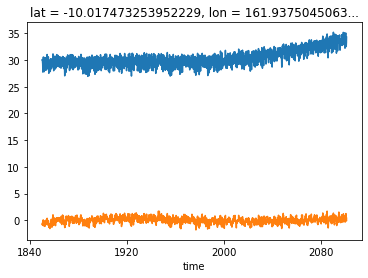

In [6]:
tsXr.sel(nlat=150,nlon=180).plot()
sstAnomXr.sel(nlat=150,nlon=180).plot()

In [7]:
indeces, pFit, eofsXr = ec.ecIndex(sstAnomXr)



In [8]:
indeces

<xarray.Dataset>
Dimensions:   (time: 3012)
Coordinates:
  * time      (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pc1       (time) float64 -1.784 -1.629 -1.405 ... -0.3559 -0.2218 0.008945
    pc2       (time) float64 -1.35 -1.591 -1.425 -1.896 ... 1.379 1.548 2.302
    eIndex    (time) float64 -0.3072 -0.02694 0.01483 ... -1.227 -1.251 -1.621
    cIndex    (time) float64 -2.216 -2.277 -2.001 -2.29 ... 0.7235 0.9375 1.634
    alpha     float64 -0.2964
    alphaDjf  float64 -0.4374

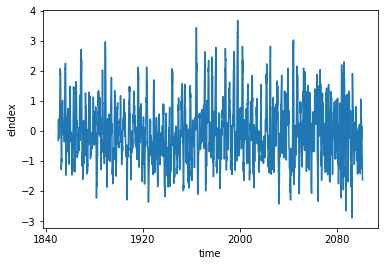

In [9]:
indeces.eIndex.plot()

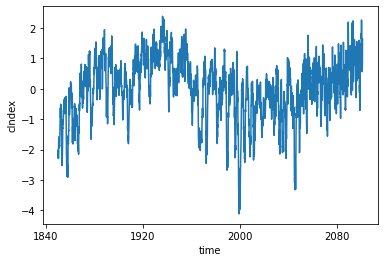

In [10]:
indeces.cIndex.plot()

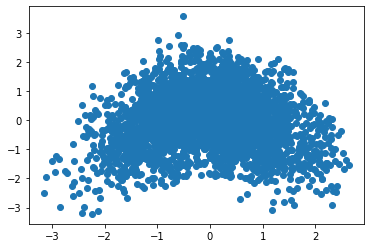

In [11]:
plt.scatter(indeces.pc1.values, indeces.pc2.values)

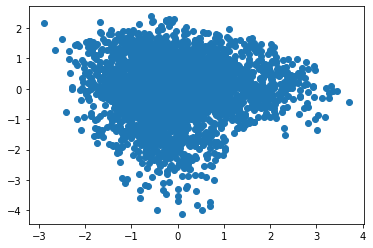

In [12]:
plt.scatter(indeces.eIndex.values, indeces.cIndex.values)

In [13]:
eofsXr

<xarray.DataArray 'eofs' (mode: 2, nlat: 112, nlon: 124)>
array([[[-1.41805272e-07,             nan,             nan, ...,
          5.38542705e-05,  5.43808589e-05,  5.77135588e-05],
        [-1.21082033e-06,             nan,             nan, ...,
          5.45893116e-05,  5.55235809e-05,  5.95366340e-05],
        [-2.46233292e-06,             nan,             nan, ...,
          5.54552633e-05,  5.68567585e-05,  6.15324378e-05],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,  1.58266788e-05,  1.43412317e-05],
        [            nan,             nan,             nan, ...,
          1.66023669e-05,  1.60023501e-05,  1.44242933e-05],
        [            nan,             nan,             nan, ...,
          1.64872707e-05,  1.61292839e-05,  1.45443278e-05]],

       [[ 2.88235828e-04,             nan,             nan, ...,
          2.12438629e-04,  2.09887330e-04,  1.88070260e-04],
        [ 2.89499645e-04,             nan,             nan, ...,
          2.09415899e-04,  2.04422072e-04,  1.78900789e-04],
        [ 2.91117332e-04,             nan,             nan, ...,
          2.05718447e-04,  1.97824510e-04,  1.68624041e-04],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,  1.24316709e-04,  1.16806165e-04],
        [            nan,             nan,             nan, ...,
          1.36226851e-04,  1.26207012e-04,  1.17422889e-04],
        [            nan,             nan,             nan, ...,
          1.37411961e-04,  1.27959601e-04,  1.18243503e-04]]])
Coordinates:
  * mode     (mode) int64 0 1
  * nlat     (nlat) int32 132 133 134 135 136 137 ... 238 239 240 241 242 243
  * nlon     (nlon) int32 161 162 163 164 165 166 ... 279 280 281 282 283 284
    lat      (nlat, nlon) float64 -14.87 -14.87 -14.87 ... 14.92 14.91 14.91
    lon      (nlat, nlon) float64 140.6 141.7 142.8 143.9 ... 276.7 277.8 279.0
Attributes:
    long_name:  empirical_orthogonal_functions

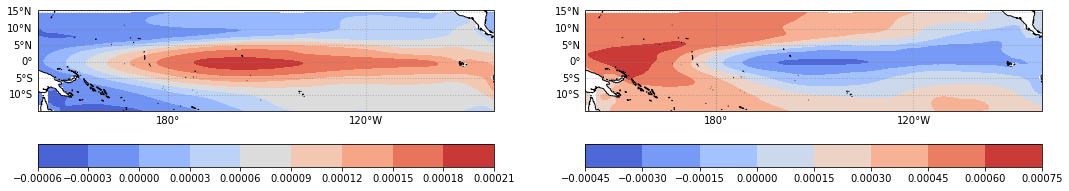

In [18]:
fig=plt.figure(figsize=(18,12))
for mode in [0,1]:
    ax=fig.add_subplot(1,2,mode+1,projection=ccrs.Miller(central_longitude=210))
    ec.ensoPlotter(eofsXr.sel(mode=mode),ax)

Those patterns match the Takahashi patterns, so we will leave them alone. 